# Data Science Project: Assessment 3

ID:201444661

Name:Naveen Ambalappat

This assessment has a 60% weight.

## Case study

Refer to the brief

## 1. Aims, objectives and plan (4 marks)

### a) Aims and objectives


The aim of the project is to build a prediction model which can predict potential fraudelent transactions. The model needs to be trained using the historical data where each transaction is flagged as either normal or fraudelent.
By keeping  £1 million as the total budget, following two requirements needs to be satisfied

1) Each false positive case costs the bank  £1k. For every  £100M of non-fraudulent transactions, a maximum of 20 transcation can be wrongly predicted as fraud.

2)Each false negative case costs the bank  £10k on average. For each 200k of fraudulent transactions, a maximum of 5 can be missed to be identified as Fraudulent.

###  b) Plan
This project was executed as per the below plan

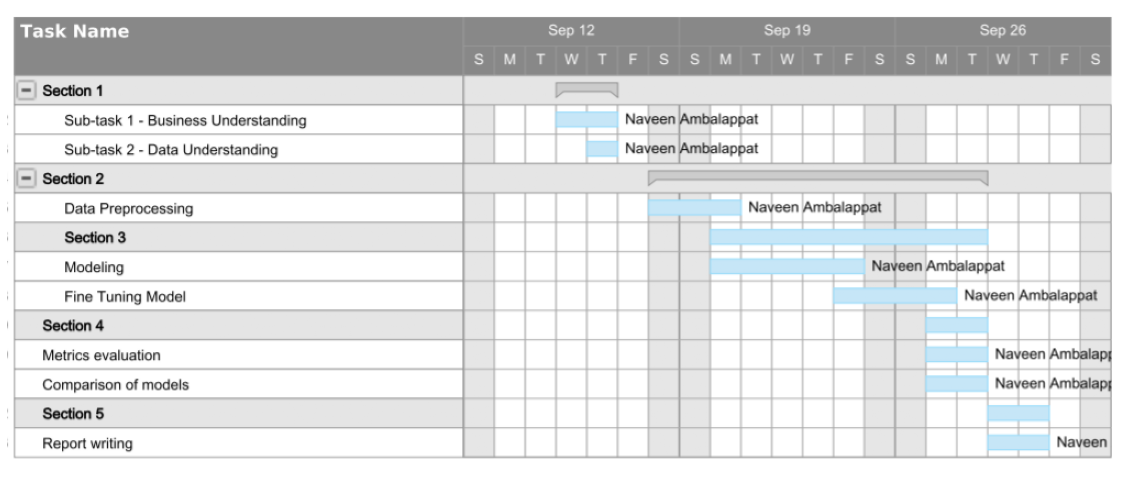

In [ ]:
import matplotlib.image as img
gannt=img.imread('gannt.PNG')
plt.figure(figsize=(20,10))
plt.axis('off')
implot=plt.imshow(gannt)

## 2. Understanding the case study (4 marks)

###  Case study analysis

1. The transaction amounts are relatively smaller. Maximum amount of fraudulent transaction is 2125 and minimum amount is 0.Maximum amount of normal transaction is 25691.Mean value is coming around 88.5.
2. There are no null values. So we don't have to work on replacing or imputing it.
3. 99.8% of the data belongs to normal transaction and 0.17% belongs to fraud transaction.
4.Features from V1 to V28 seems to be scaled as it has gone through the PCA process. There is no way we can identify what these features means in real world.
5. Amount and time needs to be scaled down depending on the algorithm we will be using.
6. This is a classification problem and need to use supervised learning algorithms like Random Forest , Decision Tree, etc
7.Confusion matrix will be used to find the number of false positive and false negatives.
8. We need to separately sum up fraudulent and non-fraudulent transaction amounts. Then we need to multiply the false positives by 1000 and false negatives by 10000. Then we need to see whether these values are not exceeding the limit set in the requiremen that is for every £100M of non-fraudulent transactions, a maximum of 20 transcation can be wrongly predicted as fraud and For each 200k of fraudulent transactions, a maximum of 5 can be missed to be identified as Fraudulent.



## 3. Pre-processing applied (20 marks)
 


**Importing the libraries**

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
from sklearn.metrics import accuracy_score
# For Random Data
from random import randint
#import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

from sklearn.metrics import classification_report


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import GridSearchCV

**Reading Data**

In [5]:
data_df=pd.read_csv("data.csv")

###  a) Preparing the labels appropriately
In the data set, we have values 0 and 1 in the column Class.

We will label the classes as below,

0= normal

1=Fraud 

In [8]:
#Create a new column transaction_type which categorizes fraud and non fraud transactions based on class value
data_df['transaction_type']=data_df['Class'].apply(lambda x: 'Normal' if x==0 else 'Fraud')

In [ ]:
total=len(data_df)
n_fraud=data_df[data_df['Class']==1]
n_non_fraud=data_df[data_df['Class']==0]

The data is highly imbalanced with 99.8% data belonging to class 0 which non-fraudlent transactions and and only 0.19% belonging to fraud transactions

In [ ]:
percent_fraud=len(n_fraud)/total
percent_non_fraud=len(n_non_fraud)/total
print('Fraud percent :',percent_fraud*100,'%')
print('Non fraud percent :',percent_non_fraud*100,'%')

Fraud percent : 0.1727485630620034 %
Non fraud percent : 99.82725143693798 %


Text(0, 0.5, 'Frequency')

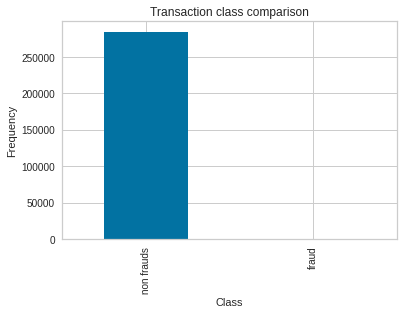

In [ ]:
target_count = data_df.Class.value_counts()
labels = ['non frauds','fraud']


target_count.plot(kind='bar', title='Count (target)')
plt.title("Transaction class comparison")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

###  b) Removing synonymous and noisy attributes


Checking for duplicate rows

In [13]:
data_df.duplicated().any()

True

**observation**

There are duplicate rows in the data

Lets drop the duplicate rows

In [14]:
data_df=data_df.drop_duplicates(keep=False)

Shape of the data frame after dropping duplicates

In [15]:
data_df.shape

(282953, 32)

###  c) Dealing with missing values
There are no missing values in the data set.

In [ ]:
data_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###  d) Rescaling if necessary
Lets find out the maximum and minimum values of each column. This will help us to decide if rescaling is necessary


In [ ]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000
mean,94816.256714,0.010161,-0.006837,0.002906,-0.004665,0.003311,-0.001734,0.002985,-0.002038,-0.002651,-0.001749,0.000529,-0.001410,0.000973,0.000262,0.002066,0.002001,0.000205,0.002709,-0.000681,0.000470,-0.000316,0.000184,0.000332,0.000372,-0.000347,0.000317,0.002830,0.000740,88.534756,0.001626
std,47479.631543,1.940990,1.643708,1.504189,1.413356,1.374938,1.331984,1.223249,1.173378,1.094047,1.069880,1.017337,0.990685,0.995584,0.947746,0.914577,0.871639,0.836799,0.836653,0.812862,0.769357,0.721104,0.724223,0.623093,0.605599,0.521199,0.481876,0.391139,0.327223,250.567570,0.040287
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54213.000000,-0.912989,-0.601721,-0.888987,-0.851101,-0.688407,-0.769506,-0.551470,-0.209036,-0.645213,-0.535495,-0.761053,-0.407033,-0.647592,-0.425859,-0.579982,-0.465990,-0.484093,-0.497235,-0.456370,-0.211207,-0.228236,-0.542743,-0.161658,-0.354423,-0.317659,-0.326567,-0.070453,-0.052736,5.590000,0.000000
50%,84704.000000,0.022459,0.062929,0.180273,-0.023625,-0.052817,-0.275914,0.041333,0.021522,-0.052847,-0.093236,-0.031708,0.137994,-0.012588,0.049812,0.050295,0.067789,-0.066202,-0.001181,0.002974,-0.062201,-0.029370,0.007041,-0.011184,0.041074,0.016162,-0.052152,0.001564,0.011312,22.000000,0.000000
75%,139294.000000,1.316582,0.797751,1.027190,0.737319,0.612704,0.395220,0.570666,0.324281,0.594912,0.453829,0.739740,0.615721,0.663506,0.491762,0.651059,0.523705,0.398005,0.502868,0.457863,0.133435,0.186184,0.528316,0.147729,0.439880,0.350621,0.239885,0.091310,0.078270,77.710000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


**Observation**

It looks like as part of PCA, values in all columns from V1 to V28 are scaled. Values in Amount and Time needs to be scaled like other columns.

In [17]:
from sklearn.preprocessing import  RobustScaler
robust=RobustScaler()
data_df['v_amount']=robust.fit_transform(data_df['Amount'].values.reshape(-1,1))
data_df['v_time']=robust.fit_transform(data_df['Time'].values.reshape(-1,1))


Drop the original Time and Amount columns

In [ ]:
data_df.drop(['Time','Amount'], axis=1, inplace=True)

### e) Other

**Balancing the data set by over sampling**

Problem: Earlier we observed that the data set is highly imbalanced. 99.8% of data belongs to one class, which is non-fraudlent. So Machine learning algorithm will not be able to understand the pattern of fraudlent transactions. 

Solution: The solution to this problem is over sampling. Oversampling model used will be SMOTE which refers to Synthetic Minority Oversampling Technique.. It aims to balance class distribution by randomly increasing minority class examples by replicating them.It synthesises new minority instances between existing minority instances.After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

Before oversampling, lets split the data to training and test set

In [18]:
# Split data for features(X) and Target(y)
X = data_df.drop('Class', axis = 1)

y = data_df['Class']

print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (282953, 33)
y Shape: (282953,)


In [21]:
X=X.drop('transaction_type',axis=1)

**Applying SMOTE**

In [19]:
from imblearn.over_sampling import SMOTE

In [22]:
#Appling SMOTE model
sm = SMOTE(random_state = 4, ratio = 1)
X1, y1 = sm.fit_sample(X, y)

X_new = pd.DataFrame(data = X1, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size = 0.2, random_state = 4, stratify = y1)


After SMOTE, shape of X and y

In [23]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (451988, 32) (451988,)
Testing Data Shape: (112998, 32) (112998,)


## 4. Technique 1 (20 marks)
**Random Forest**

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

Since number of training data is sufficiently large for our data set when compared with the number of features,Random Forest which has usually a low bias/high variance is a good choice for this problem. Also Random Forest algorithm is flexible as they can generate wider range of possible combination of trees with random data. As per the stringent requirement, we need a model which can give higher accuracy. So a flexible model like Random Forest highly suitable.
Random forest is one of the most popular supervised learning algorithms. It can be applied in classifications problems very well. Our data set is very complex and big. So Random forests generate decision trees from randomly chosen data samples, receives predictions from each tree, and chooses the optimal solution by means of voting.


Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale
Lets try to run RandomForestClassifier with default parameters
n_estimators=100,criterion='gini,min_samples_split=2

In [136]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
y_pred = clf.predict(X_test)

In [138]:
print('Accuracy Score (Train Data):', np.round(clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(X_test, y_test), decimals = 3))

Accuracy Score (Train Data): 1.0
Accuracy Score (Test Data): 1.0


In [139]:
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56499
           1       1.00      1.00      1.00     56499

    accuracy                           1.00    112998
   macro avg       1.00      1.00      1.00    112998
weighted avg       1.00      1.00      1.00    112998



**Observation**
Accuracy, precision and recall is giving 100%. There seems to be some overfitting happening.

### c) Optimising hyper parameters
It looks like there is some overfitting happening in the model. So we need to do some hyperparameter tuning for this algorithm.

Most important hyperparameters which we can fine tune include,

**N_estimators**- We can define the number of decision trees in the forest in random forest models, which are ensembles of decision trees. Additional decision trees improve model accuracy since predictions are based on a higher number of "votes" from different trees; yet, huge numbers of trees are computationally expensive. We can define the number of decision trees in the forest in random forest models, which are ensembles of decision trees. Additional decision trees improve model accuracy since predictions are based on a higher number of "votes" from different trees; yet, huge numbers of trees are computationally expensive.

**max_features**- The number of features to resample is determined by max features. Larger max feature values can enhance model performance by giving trees more features from which to find the optimum split, but they can also make trees less diversified and lead to overfitting.

max_depth-The random forest model splits each tree numerous times to extract homogeneous groupings of outcomes. Trees with more splits allow them to explain more variety in the data, but trees with more divides may overfit the data. A variety of depth settings should be considered, including "None," which involves splitting trees until all of the leaves are pure.

We will use randomizedsearch method from sklearn to find the best values of above parameters


**Undersampling for time saving**
For hyperparameter fine tuning, we will do undersampling of original data instead of oversampling. This will save lot of time as oversampled data is about more than 400k and not finishing even after running for more than 2 hours.

In [ ]:
#Read original data and drop duplicates
data_undersample=pd.read_csv("data.csv")
data_undersample=data_undersample.drop_duplicates(keep=False)

#Perform scaling
from sklearn.preprocessing import  RobustScaler
robust=RobustScaler()
data_undersample['v_amount']=robust.fit_transform(data_undersample['Amount'].values.reshape(-1,1))
data_undersample['v_time']=robust.fit_transform(data_undersample['Time'].values.reshape(-1,1))
data_undersample.drop(['Time','Amount'], axis=1, inplace=True)

X_undersample = data_undersample.drop('Class', axis = 1)
y_undersample = data_undersample['Class']

In [ ]:
#Perform undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample= RandomUnderSampler(sampling_strategy='majority')
X2, y2 = under_sample.fit_resample(X_undersample, y_undersample)
X_new2 = pd.DataFrame(data = X2, columns = X_undersample.columns)
X_train2, X_test2, y_train2, y_test2=train_test_split(X_new2, y2, test_size = 0.2, random_state = 3, stratify = y2)

In [ ]:
#Setting parameters of RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }

In [ ]:

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [ ]:
random_search.fit(X_train2, y_train2)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=4,
                                                    min_weight_fraction_leaf=0.0,
            

After finetuning, we can see the best parameters and the possible value which gives highest accuracy

In [ ]:
random_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 700}

In [ ]:
random_search.best_score_

0.9306949806949806

**new model definintion**

Define the new model based on the findings from hyperparameter tuning

In [51]:
clf_tuned = RandomForestClassifier(bootstrap=True,n_estimators = 700, max_depth = 4, 
                               min_samples_split = 8, min_samples_leaf = 4,criterion='entropy')

### d) Performance metrics for training
**RandomForest Classifier**

In [ ]:
print('Accuracy Score (Train Data):', np.round(clf_tuned.score(X_train, y_train), decimals = 3))

Accuracy Score (Train Data): 1.0


In [ ]:

oversample_RF_report = classification_report(y_train,y_pred )
print(oversample_RF_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    225994
           1       1.00      1.00      1.00    225994

    accuracy                           1.00    451988
   macro avg       1.00      1.00      1.00    451988
weighted avg       1.00      1.00      1.00    451988



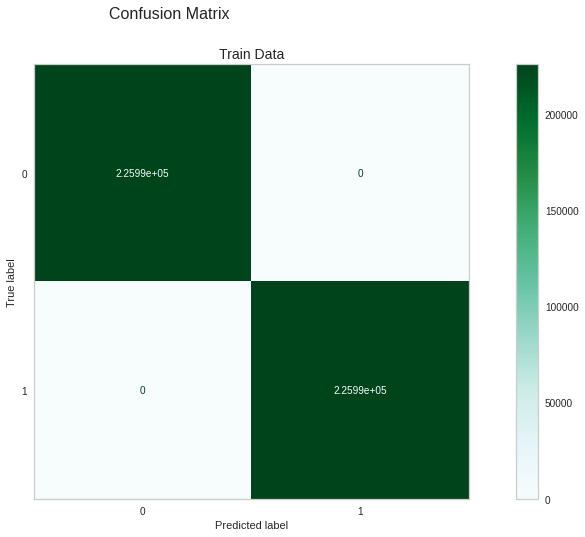

In [ ]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, sharex = False, figsize=(17, 8))
plot_confusion_matrix(estimator = clf, X = X_train, y_true = y_train, values_format = '.5g', cmap = 'BuGn', ax = ax1)

ax1.set_title(label = 'Train Data', size = 14)

ax1.grid(b = False)

plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

## 5. Technique 2 (20 marks)
**Logistic Regression**

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process
Logistic regression is applied to predict the categorical dependent variable. In other words, it's used when making a categorical prediction, such as yes or no, true or false, 0 or 1. There is no middle ground when it comes to the predicted probability or output of logistic regression. So it helps in solving classification problems. Our problem of fraud detection rightly falls into this category of problems.

Logistic regression is a lot easier to use than linear regression, and it's also a lot faster to train.Also it doesn't make any assumption about the distribution of classes in the feature space.

For Logistic regression also, input data set is divided into training and test set. After training, model is tested with the test data with threshold cutoff of 0.5 for prediction and max_iter=1000.

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale

Running the model with default parameters

In [ ]:
log  = LogisticRegression(random_state = 42,max_iter=1000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print('Accuracy Score for test data:', np.round(log.score(X_test, y_test), decimals = 3))
log_report = classification_report(y_test, y_pred)
print(log_report)

Accuracy Score for test data: 0.946
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56499
           1       0.97      0.92      0.94     56499

    accuracy                           0.95    112998
   macro avg       0.95      0.95      0.95    112998
weighted avg       0.95      0.95      0.95    112998



**Observation**

Precision looks good for fradulent transaction.

Precision and Recall for non-fraudulent transaction is lesser.


### c) Optimising hyper parameters

We will try to see if there is any change in the performance of the model by doing hypertuning of following parameters,

**Parameter C:**
The parameter C=1/λ is used as one of the  regularization parameter. Lambda's values control the complexity of the algorithm. For less values of λ, model assigns big weights to its parameters. For higher values, model becomes simple.Parameter C is inversely proportional to λ which means small values of C increases the regularization strength which might underfit the data and higher values of C can cause overfitting.

**Parameter solver:**
Solver is the optimization algorithm. liblinear is a good choice for smaller data set. Sag and Saga are good for bigger data sets.


In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 100],
            'max_iter': list(range(800,1000)),
            'penalty': ['l1', 'l2'],
            'solver': [ 'liblinear', 'sag', 'saga']
    }


n_iter_search = 50
lr_random_search = RandomizedSearchCV(log, param_distributions = param_grid,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)



In [ ]:
lr_random_search.fit(X_train2,y_train2)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 100],
                                        'max_iter': [800, 801, 802, 803, 804,
                                                     805, 806, 807, 808, 809,
                                                     81

**Observation**

After finetuning with randomsearchcv method, we can see that the best possible values for parameters is as below

c -100,
max_iter- 816, penalty-l1, solver-liblinear

In [ ]:
lr_random_search.best_params_

{'C': 100, 'max_iter': 816, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
lr_random_search.best_score_

0.9374885089170804

**Metrics Evaluation**

Defining the logistic regression model based on new parameters and see how it is performing on test data

In [45]:
log_tuned=LogisticRegression(C=100, max_iter=816,penalty='l2', random_state=42,solver='liblinear')

                                                

### d) Performance metrics for training


**Logistic Regression**

In [ ]:
y_pred = log_tuned.predict(X_train)

print('Accuracy Score (Train Data):', np.round(log_tuned.score(X_train, y_train), decimals = 3))
#print('Accuracy Score (Test Data):', np.round(log_tuned.score(X_test, y_test), decimals = 3))

Accuracy Score (Train Data): 0.947


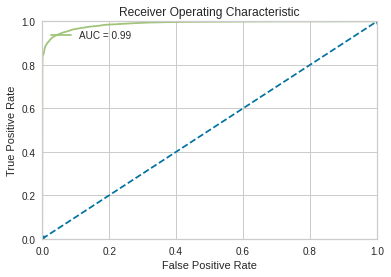

In [ ]:
from sklearn import metrics
probs = log.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'v--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 6. Comparison of metrics performance for testing (16 marks)
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Use of cross validation for both techniques to deal with over-fitting

**RandomForest Classifier**

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [48]:
cross_val=cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [52]:
RF=RandomForestClassifier()
scores = cross_val_score(clf_tuned, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [53]:
scores

array([0.99971727, 0.99954057, 0.99939921, 0.9993285 , 0.99943453,
       0.99943453, 0.99918714, 0.99918714, 0.9993285 , 0.99936385])

In [54]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.999 (0.000)


**Logistic Regression**

In [49]:

scores_logic = cross_val_score(log_tuned, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [50]:
print('Accuracy: %.3f (%.3f)' % (mean(scores_logic), std(scores_logic)))

Accuracy: 0.999 (0.000)


### b) Comparison with appropriate metrics for testing

###Accuracy, Precision and Recall
We will be using three metrics for comparing the performance of each technique
**Accuracy,Precision** and **Recall**



In [152]:
print ('\n ******RandomForest Classifer*******\n')

print('Accuracy Score with Test Data:', np.round(clf_tuned.score(X_test, y_test), decimals = 3))
print('\n')
random_forest_report_tuned = classification_report(y_test, y_pred_rf)
print(random_forest_report_tuned)

print('\n*******Logistic Regression********\n')
#print ('\n\n')
y_pred_log = log_tuned.predict(X_test)
print('Accuracy Score for test data:', np.round(log.score(X_test, y_test), decimals = 3))
print('\n')
log_report_tuned = classification_report(y_test, y_pred_log)
print(log_report_tuned)


 ******RandomForest Classifer*******

Accuracy Score with Test Data: 0.93


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     56499
           1       1.00      0.86      0.92     56499

    accuracy                           0.93    112998
   macro avg       0.94      0.93      0.93    112998
weighted avg       0.94      0.93      0.93    112998


*******Logistic Regression********

Accuracy Score for test data: 0.946


              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56499
           1       0.97      0.92      0.94     56499

    accuracy                           0.95    112998
   macro avg       0.95      0.95      0.95    112998
weighted avg       0.95      0.95      0.95    112998



**Observation**

Accuracy of Logistic Regression technique is better than Random Forest.

Although accuracy of logistic regression is better, we can Random Forest has a higher precision rate in predicting fraudulent transactions.

Also the recall of Random Foreset is higher indicating a less False negative cases.

### **Confusion Matrix**


 ******RandomForest Classifer*******



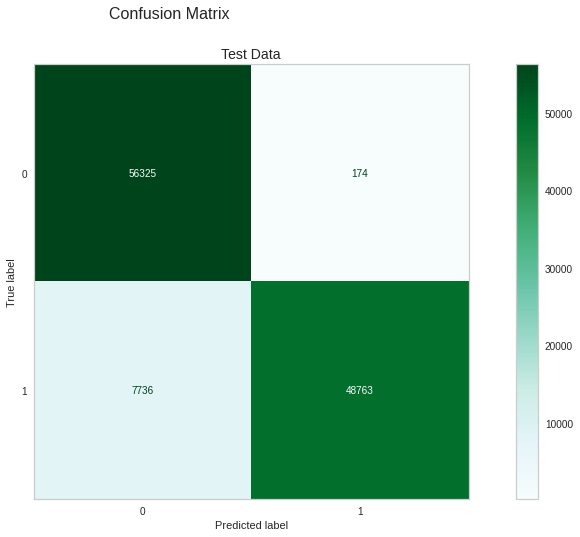


 ******Logistic Regression*******



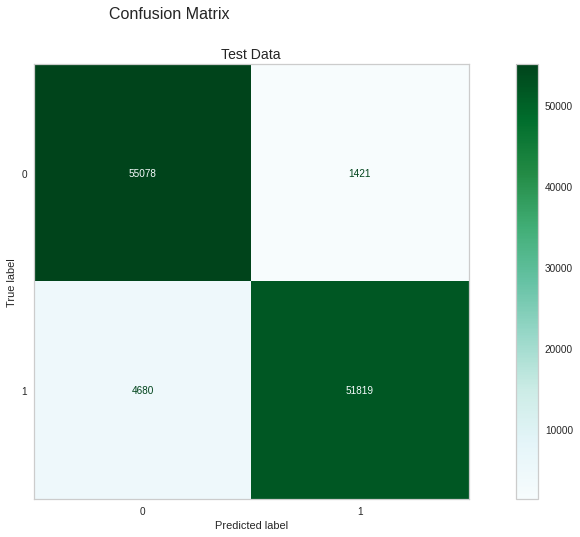

In [160]:
print ('\n ******'+ '\033[1m'+'RandomForest Classifer'+'\033[0m'+'*******\n')
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, sharex = False, figsize=(17, 8))
plot_confusion_matrix(estimator = clf_tuned, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'BuGn', ax = ax1)

ax1.set_title(label = 'Test Data', size = 14)

ax1.grid(b = False)

plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

print ('\n ******'+ '\033[1m'+'Logistic Regression'+'\033[0m'+'*******\n')
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, sharex = False, figsize=(17, 8))
plot_confusion_matrix(estimator = log_tuned, X = X_test, y_true = y_test, values_format = '.5g', cmap = 'BuGn', ax = ax1)

ax1.set_title(label = 'Test Data', size = 14)

ax1.grid(b = False)

plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()

**Observation**

False positives are lesser in the case of RandomForest Classifier. This will be good for satisfying requirement1

False negatives are lesser in the case of Logistic regression. This is good for satisfying requirement2.

### c) Model selection (ROC or other charts)

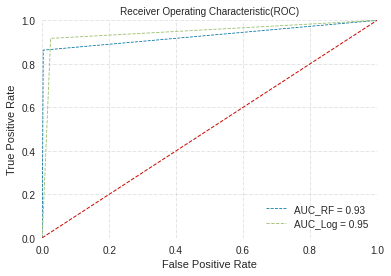

In [164]:
from sklearn import metrics
probab = clf_tuned.predict_proba(X_test)
predi = probab[:,1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, y_pred_rf)
fpr_log, tpr_log, threshold_log = metrics.roc_curve(y_test, y_pred_log)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
roc_auc_mlp = metrics.auc(fpr_log, tpr_log)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic(ROC)',fontdict={'size':10})
plt.plot(fpr_rf, tpr_rf, 'b--', linewidth=0.8,label = 'AUC_RF = %0.2f' % roc_auc_rf)
plt.plot(fpr_log, tpr_log, 'g--',linewidth=0.9, label = 'AUC_Log = %0.2f' % roc_auc_mlp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',linewidth=1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(linestyle='--', alpha=0.5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)

plt.show()

**Observation**

The Area Under the Curve (AUC) - ROC curve is the performance statistic for classification issues at various threshold levels. AUC represents the degree or measure of separability, whereas ROC is a probability curve. It indicates how well the model can distinguish between classes. The AUC indicates how well the model predicts 0 classes as 0 and 1 courses as 1. The higher the AUC, the better the model predicts 0 classes as 0 and 1 classes as 1.

In the above graph, X-axis is plotted with False Positive Rate against True Positive Rate in y-axis. From the graph we can see the Random Forest model gives a better performance than logistic regression as it is more inline with the true positive axis.


## 7. Final recommendation of best model (8 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency
It was found that data set was highly imbalanced. This was resolved using oversampling technique.Random Forest and Logistic Regression are the two techniques applied to build the model.There seemed to be an overfitting issue with Random Forest as it was giving 100% accuracy with default parameters. This issue was kind of resolved using hyperparameter tuning. 10 fold Cross validation  is also performed to avoid any further overfitting. Logistic Regression was giving the same results before and after hyperparameter tuning. False positives were lesser with Random Forest and was giving a higher precision while predicting fraudulent transaction. False negatives were lesser in Logistic regression and giving a better recall compared to Random Forest. Even from the ROC graph, we can see the Random Forest model gives a better performance than logistic regression as it is more inline with the true positive axis.


### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective


**Checking Requirement**

In [ ]:

df1=X_test
df1.loc[:,'Class']=y_test

In [36]:
#Total sum of non-fraudulent transaction
sum(df1[df1['Class']==0]['Amount'])

5017465.510000887

In [37]:
##Total amount involved in fraudulent transaction
sum(df1[df1['Class']==1]['Amount'])

5902056.679229335

In [ ]:
#Requirement1
#Budget for 100m=20k
#cost of non fraudulent transaction wrongly classified as fraudulent(False Positive)= 1k
#So number of wrong transaction allowed for 100m=20
#number of wrong transaction allowed for 5017465= (20/100)*5017465=1

In [ ]:
#Requirement 2
#number of false negatives allowed for 200k = 5
#number of false negatives for 59m=(5902056/200000)=29

**Requirement1**

Out of the 56499 non-fraudlent transactions,174 transactions were wrongly predicted as fraud transactions. Total amount involved in non-fraudlent transactions was 5017465. So we are allowed only to have 1 non-fraudulent transaction to be wrongly predicted as fraudulent. In our case, the model base on Random Forest has predicted 174 transactions wrongly. So the model couldn't satisy requirement1.

**Requirement2**

Out of the 56499 fraud transactions,Random Forest couldn't classify 4680 as fraud. In the case of logistic regression, the number missed was 7736. 
Total amount involved in fraud transactions were 5902056. As per the requirement, number of fruad transaction we could miss for this amount was 29. So the model couldn't meet requirement2. 

**Conclusion**

Since we have high number of data related to non-fraud transactions, the result of requirement 1 is much better than requirement 2. In the case of requirement 2, there was very less number of Fraud transactions available. Because of this, model might not be able to find a unique pattern about fraud transactions.

## 8. Conclusion (8 marks)

### a) What has been successfully accomplished and what has not been successful?
Out of the 56499 non-fraud transactions, only 174 were misclassified. If we further fine tune our models, we could achieve the target in the requirement.Oversampling was successful as we could generate a well balanced dataset( atleast in numbers). 

56325 transactions were successfully classified as fraud transactions out of 56499 total number of transactions which is a good achievement

Although the model has 99.69% success rate in detecting fraud transactions, the requirements given by the bank is not met by our model . The requirement is based on the amount not on the total number of transactions. Out of the two requirements, requirement2 was the least successful. Oversampling could balance the data set but it looks like it is not able to simulate a fraud transaction and hence model might not be to find a strong pattern 

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?
Only two techniques were applied on this data. It would be interesting to see how other techniques like Convolutional Neural Network, SVM would have behaved with this data. Also, while doing hyperparameter tuning, data was undersampled as it was taking hours of time to run methods like gridsearchcv. It would be better to run it on a machine with more computing power. Also I would like to try some data mining tool like rapid miner to do some prototyping and produce schematic structure of the analysis. Some clustering methods like t-SNE could be used to cluster the cases that were and not fraud.

### c) Provide a wish list of future work that you would like to do


Since the models developed as part of this project didn't meet the requirements given by the bank, I would like to explore more fine tuning method. It would be challenging to design a better model which could satisfy the requirements. This might be because of the less availability of data related to fraud transactions. So I would like to identify some data sets which has more fraud transactions and merge it up with this data. This might help the model to identify a pattern about the fraudulent transactions.